Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

Load dataset and prepare df. Keeping only those columns, that are not directly computed out of new deaths, and have the highest correlation

In [2]:
file_path = "./data/BTC-USD.csv"
date_column = "Date"
target_column = "Close"
df = pd.read_csv(file_path, parse_dates=[date_column]).drop(columns=["Adj Close"])


In [3]:
print(f"First date in dataset {df[date_column].min()}")
print(f"Last date in dataset {df[date_column].max()}")
print(f"Number of rows {len(df)}")


First date in dataset 2014-09-17 00:00:00
Last date in dataset 2024-02-02 00:00:00
Number of rows 3426


In [4]:

date = df[date_column]

df.sort_index(inplace=True)
# df = df.select_dtypes(exclude=['object'])
correlation_with_target = (
    df.select_dtypes(exclude=["object"])
    .drop(columns=[target_column])
    .corrwith(df[target_column])
)
most_corr = correlation_with_target.sort_values(ascending=False).index.tolist()
most_corr = list(set(most_corr[:10] + most_corr[-10:]))
df = df[most_corr].merge(df[target_column], left_index=True, right_index=True)
most_corr

TypeError: reduction operation 'corr' not allowed for this dtype

Plot the dataset

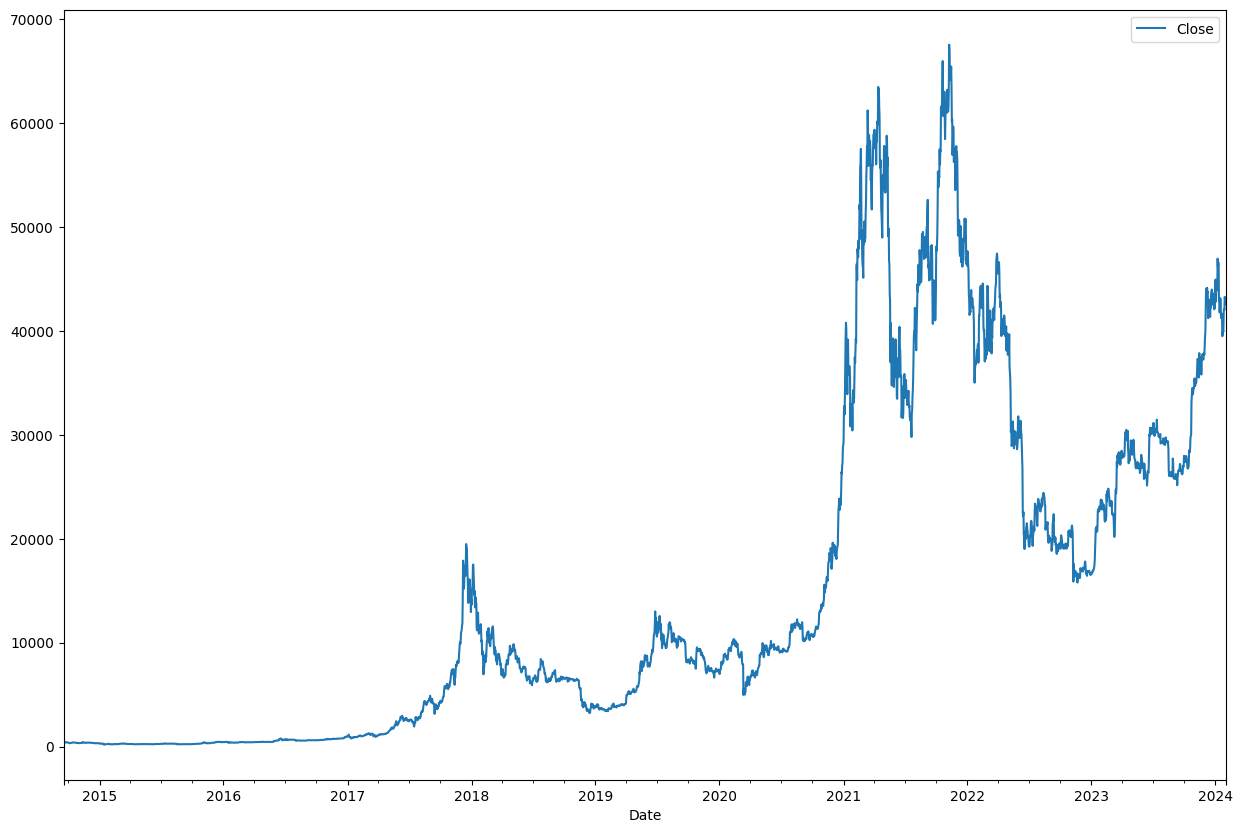

In [ ]:
plot_cols = [target_column]
plot_features = df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(15, 10))

Display first values

In [ ]:
df.head(20)

,High,Open,Low,Volume,Close
Date,,,,,
2014-09-17,468.174011,465.864014,452.421997,21056800,457.334015
2014-09-18,456.859985,456.859985,413.104004,34483200,424.440002
2014-09-19,427.834991,424.102997,384.532013,37919700,394.795990
2014-09-20,423.295990,394.673004,389.882996,36863600,408.903992
2014-09-21,412.425995,408.084991,393.181000,26580100,398.821014
2014-09-22,406.915985,399.100006,397.130005,24127600,402.152008
2014-09-23,441.557007,402.092010,396.196991,45099500,435.790985
2014-09-24,436.112000,435.751007,421.131989,30627700,423.204987
2014-09-25,423.519989,423.156006,409.467987,26814400,411.574005


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
High,3426.0,1.519060e+04,1.673543e+04,2.117310e+02,9.479787e+02,8.522883e+03,2.587755e+04,6.878962e+04
Open,3426.0,1.484498e+04,1.634579e+04,1.768970e+02,9.230285e+02,8.321371e+03,2.499960e+04,6.754973e+04
Low,3426.0,1.447307e+04,1.590994e+04,1.715100e+02,9.173405e+02,8.143934e+03,2.450911e+04,6.638206e+04
Volume,3426.0,1.664274e+10,1.904480e+10,5.914570e+06,1.740438e+08,1.188649e+10,2.694028e+10,3.509679e+11
Close,3426.0,1.485611e+04,1.634816e+04,1.781030e+02,9.268042e+02,8.321381e+03,2.510670e+04,6.756683e+04


In [ ]:
df.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-27',
               '2024-01-28', '2024-01-29', '2024-01-30', '2024-01-31',
               '2024-02-01', '2024-02-02'],
              dtype='datetime64[ns]', name='Date', length=3426, freq=None)

Decompose the time series into trend, seasonal, and residual components and plot them

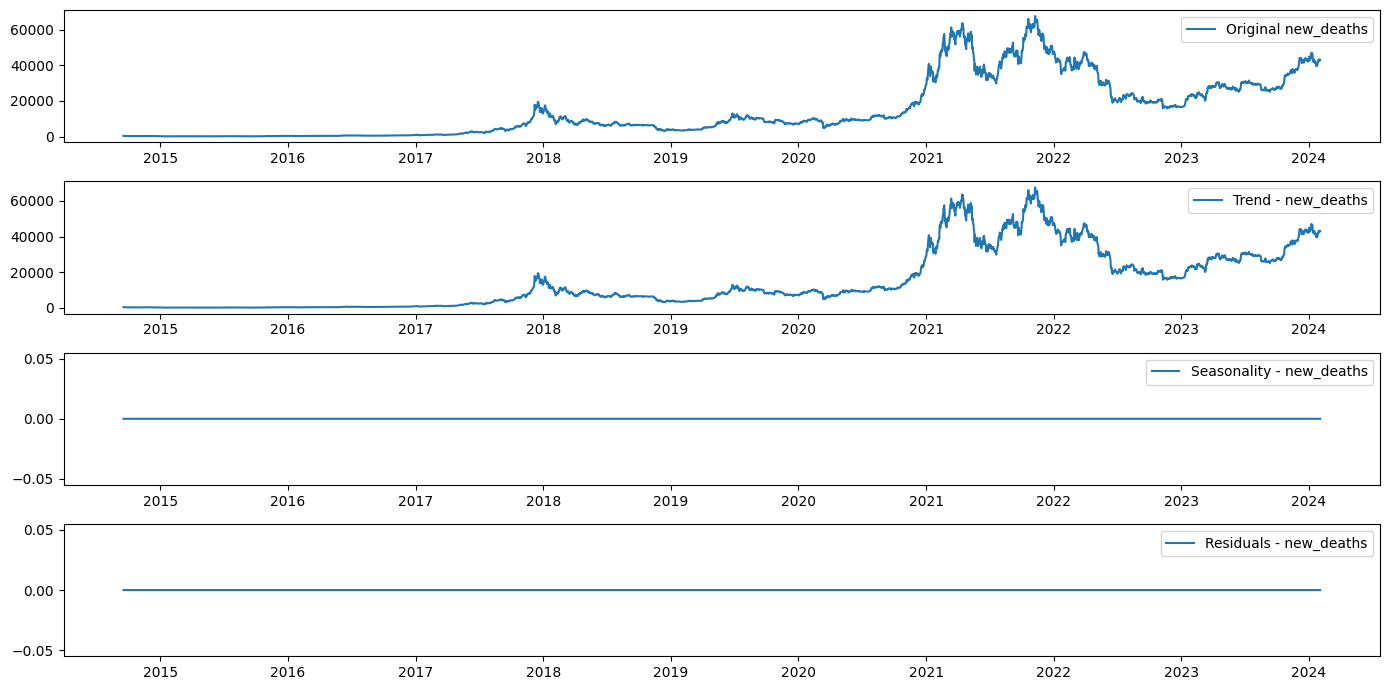

count     3426.000000
mean     14856.108846
std      16348.164130
min        178.102997
25%        926.804230
50%       8321.381348
75%      25106.704101
max      67566.828125
Name: Close, dtype: float64


In [ ]:
decomposition = seasonal_decompose(df[target_column], model="aditive", period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(14, 7))

plt.subplot(411)
plt.plot(df[target_column], label=f"Original new_deaths")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend, label=f"Trend - new_deaths")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal, label=f"Seasonality - new_deaths")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual, label=f"Residuals - new_deaths")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

# Display summary statistics for the current target_column
print(df[target_column].describe())

Due to zero values we don't make multiplicative

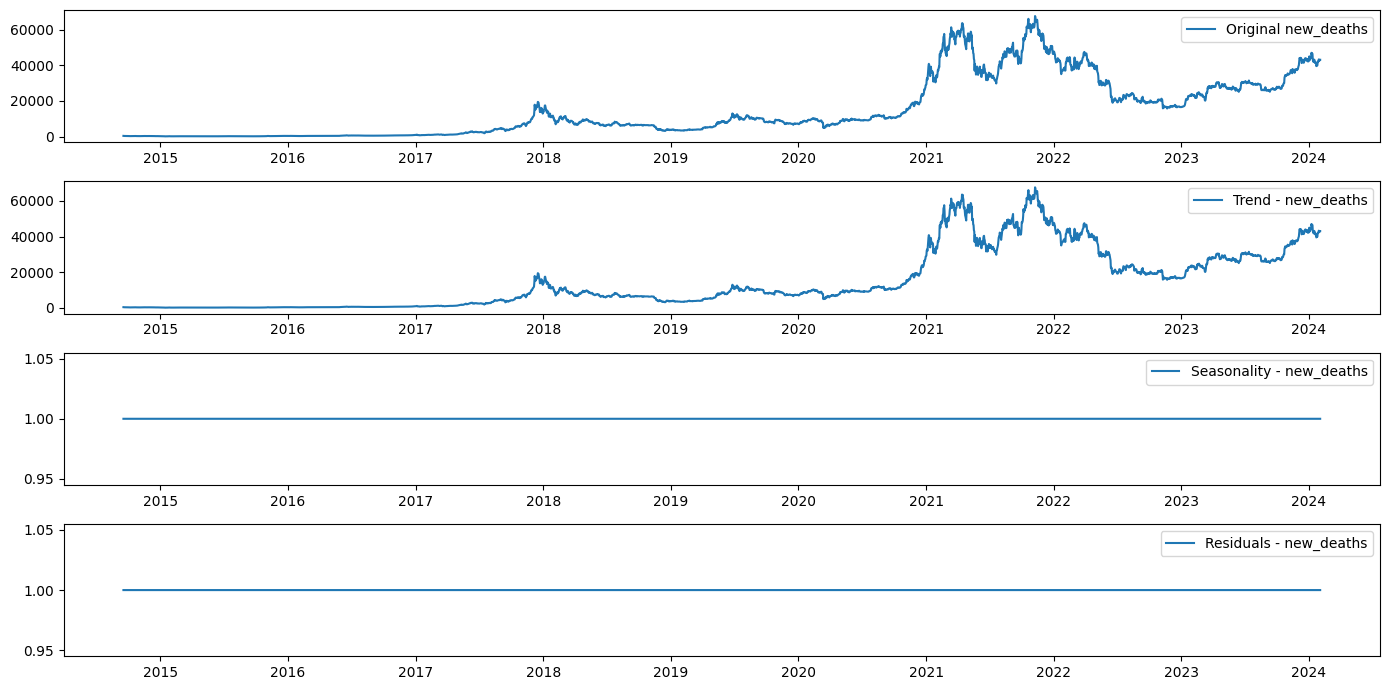

count     3426.000000
mean     14856.108846
std      16348.164130
min        178.102997
25%        926.804230
50%       8321.381348
75%      25106.704101
max      67566.828125
Name: Close, dtype: float64


In [ ]:
decomposition = seasonal_decompose(df[target_column], model="multiplicative", period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(14, 7))

plt.subplot(411)
plt.plot(df[target_column], label=f"Original new_deaths")
plt.legend(loc="best")

plt.subplot(412)
plt.plot(trend, label=f"Trend - new_deaths")
plt.legend(loc="best")

plt.subplot(413)
plt.plot(seasonal, label=f"Seasonality - new_deaths")
plt.legend(loc="best")

plt.subplot(414)
plt.plot(residual, label=f"Residuals - new_deaths")
plt.legend(loc="best")

plt.tight_layout()
plt.show()

# Display summary statistics for the current target_column
print(df[target_column].describe())

Plot ACF and PACF

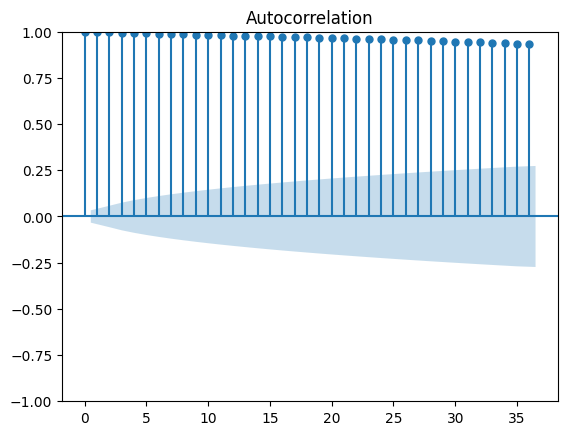

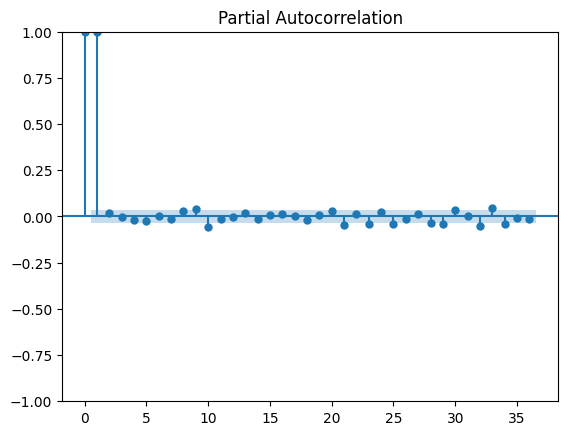

In [ ]:
plot_acf(df[[target_column]])
plt.show()

plot_pacf(df[[target_column]])
plt.show()

Determine whether the dataset is stationary

In [ ]:
def adf_test(dataset):
    dftest = adfuller(dataset, autolag="AIC")
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t", key, ": ", val)


adf_test(df[target_column])

1. ADF :  -1.2795795665162204
2. P-Value :  0.6384621412852363
3. Num Of Lags :  29
4. Num Of Observations Used For ADF Regression: 3396
5. Critical Values :
	 1% :  -3.432277046455104
	 5% :  -2.8623914576657032
	 10% :  -2.5672232470994074


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, tsmode=True)
profile.to_file("profile_report.html")

/home/samuell/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/samuell/.local/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/home/samuell/.local/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecat

In [ ]:
import pandas as pd

# Example: Load your data
# Replace 'your_stock_data.csv' with your actual file path
df = pd.read_csv(file_path, parse_dates=True)[[date_column, target_column]]
from scipy.ndimage import shift
new_df = df.copy().iloc[7:]
for i in range(1,8):
    new_column = shift(df[target_column], shift=i)[7:]
    new_df[f'Closed_{i}_ago'] = new_column
df = new_df
# Convert the 'Date' column to datetime and set it as the index
df.set_index('Date', inplace=True)

df.to_csv('./data/parsed_dataset.csv')
